/home/bblab/ros2_ws/data/log/2024-08-29/2024-08-29-21-54_vision-calibrated"# "local"_Kp1Ki0Kd3.5_px1.14-6x-calibrated.log


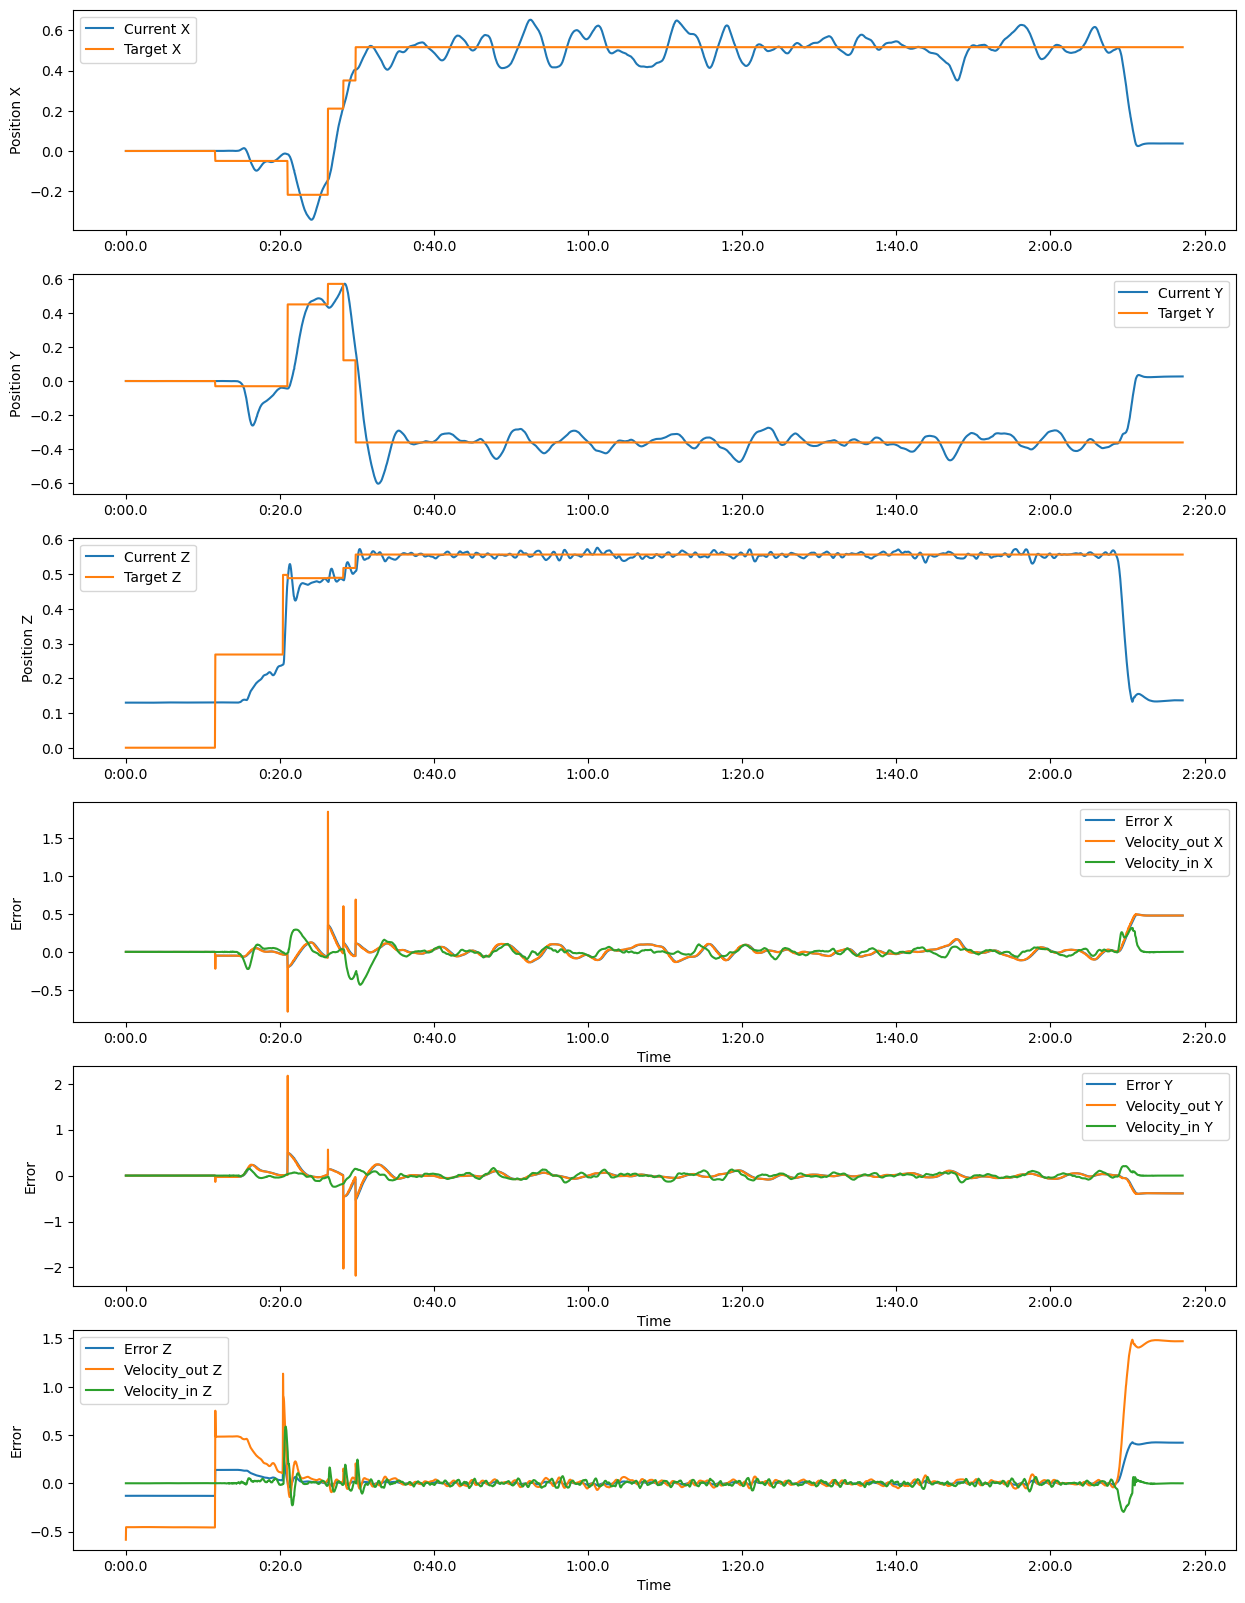

      Duration  Current Pose X  Current Pose Y  Current Pose Z       Yaw  \
0            0       -0.000105        0.000123        0.129973  1.861392   
1           27       -0.000102        0.000126        0.129983  1.861395   
2           65       -0.000096        0.000128        0.129994  1.861393   
3           91       -0.000122        0.000100        0.129998  1.861395   
4          153       -0.000109        0.000103        0.129998  1.861397   
...        ...             ...             ...             ...       ...   
4108    137033        0.037173        0.026870        0.136489  1.889064   
4109    137063        0.037164        0.026881        0.136500  1.889060   
4110    137098        0.037156        0.026893        0.136513  1.889046   
4111    137131        0.037149        0.026911        0.136535  1.889029   
4112    137165        0.037148        0.026923        0.136555  1.889023   

      Target Pose X  Target Pose Y  Target Pose Z  Target Yaw  Velocity_out X  \
0     

In [2]:
# Import necessary libraries
from datetime import datetime
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog
import pandas as pd
import re
import os

# Function to format the duration in min:sec:millisecond format
def format_duration(ms):
    seconds, milliseconds = divmod(ms, 1000)
    minutes, seconds = divmod(seconds, 60)
    return f"{int(minutes)}:{int(seconds):02d}.{int(milliseconds)}"

# Function to parse the log file
def parse_log_file(filepath):
    columns = [
        'Duration', 'Current Pose X', 'Current Pose Y', 'Current Pose Z', 'Yaw',
        'Target Pose X', 'Target Pose Y', 'Target Pose Z', 'Target Yaw',
        'Velocity_out X', 'Velocity_out Y', 'Velocity_out Z',
        'Velocity_in X', 'Velocity_in Y', 'Velocity_in Z',
        'Error X', 'Error Y', 'Error Z',
        'Kp', 'Ki', 'Kd', 'Kp_z', 'Ki_z', 'Kd_z', 'Kp_yaw', 'Ki_yaw', 'Kd_yaw'
    ]
    data = {col: [] for col in columns}
    start_time = None  # Variable to store the start time

    with open(filepath, 'r') as file:
        for line in file:
            pattern = (
                r"Current Pose: X: (.*?), Y: (.*?), Z: (.*?), Yaw: (.*?), "
                r"Target Pose: X: (.*?), Y: (.*?), Z: (.*?), Yaw: (.*?), "
                r"Velocity_out: X: (.*?), Y: (.*?), Z: (.*?), "
                r"Velocity_in: X: (.*?), Y: (.*?), Z: (.*?), "
                r"Error: X: (.*?), Y: (.*?), Z: (.*?), "
                r"Kp: (.*?), Ki: (.*?), Kd: (.*?), "
                r"Kp_z: (.*?), Ki_z: (.*?), Kd_z: (.*?), "
                r"Kp_yaw: (.*?), Ki_yaw: (.*?), Kd_yaw: (.*?), Time: (\d+)"
            )
            match = re.search(pattern, line)
            if match:
                if start_time is None:
                    start_time = int(match.group(27))  # Initialize start time
                current_time = int(match.group(27))
                duration = current_time - start_time  # Calculate duration
                data['Duration'].append(duration)  # Use duration instead of absolute time

                for i, col in enumerate(columns[1:]):
                    data[col].append(float(match.group(i + 1)))


    return pd.DataFrame(data)

# Function to plot the data
def plot_data(df):

    fig, axs = plt.subplots(6, 1, figsize=(15, 20))
    for ax in axs:
         # Set the x-axis to use the custom formatter
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format_duration(x)))
        
    axs[0].plot(df['Duration'], df['Current Pose X'], label='Current X')
    axs[0].plot(df['Duration'], df['Target Pose X'], label='Target X')
    axs[0].set_ylabel('Position X')
    axs[0].legend()
    
    axs[1].plot(df['Duration'], df['Current Pose Y'], label='Current Y')
    axs[1].plot(df['Duration'], df['Target Pose Y'], label='Target Y')
    axs[1].set_ylabel('Position Y')
    axs[1].legend()
    
    axs[2].plot(df['Duration'], df['Current Pose Z'], label='Current Z')
    axs[2].plot(df['Duration'], df['Target Pose Z'], label='Target Z')
    axs[2].set_ylabel('Position Z')
    axs[2].legend()
    
    axs[3].plot(df['Duration'], df['Error X'], label='Error X')
    axs[3].plot(df['Duration'], df['Velocity_out X'], label='Velocity_out X')
    axs[3].plot(df['Duration'], df['Velocity_in X'], label='Velocity_in X')
    axs[3].set_ylabel('Error')
    axs[3].set_xlabel('Time')
    axs[3].legend()

    axs[4].plot(df['Duration'], df['Error Y'], label='Error Y')
    axs[4].plot(df['Duration'], df['Velocity_out Y'], label='Velocity_out Y')
    axs[4].plot(df['Duration'], df['Velocity_in Y'], label='Velocity_in Y')
    axs[4].set_ylabel('Error')
    axs[4].set_xlabel('Time')
    axs[4].legend()

    axs[5].plot(df['Duration'], df['Error Z'], label='Error Z')
    axs[5].plot(df['Duration'], df['Velocity_out Z'], label='Velocity_out Z')
    axs[5].plot(df['Duration'], df['Velocity_in Z'], label='Velocity_in Z')
    axs[5].set_ylabel('Error')
    axs[5].set_xlabel('Time')
    axs[5].legend()

    
    plt.show()

# Pop up a file dialog for the user to choose the log file
Tk().withdraw()  # We don't want a full GUI, so keep the root window from appearing
initial_dir = os.path.expanduser("/home/bblab/ros2_ws/data/log")  # Get the path to the ROS workspace
filepath = filedialog.askopenfilename(initialdir=initial_dir)  # Show an "Open" dialog box and return the path to the selected file

# Parse the log file and plot the data
df = parse_log_file(filepath)
print(filepath)
plot_data(df)

# Print data
print(df)

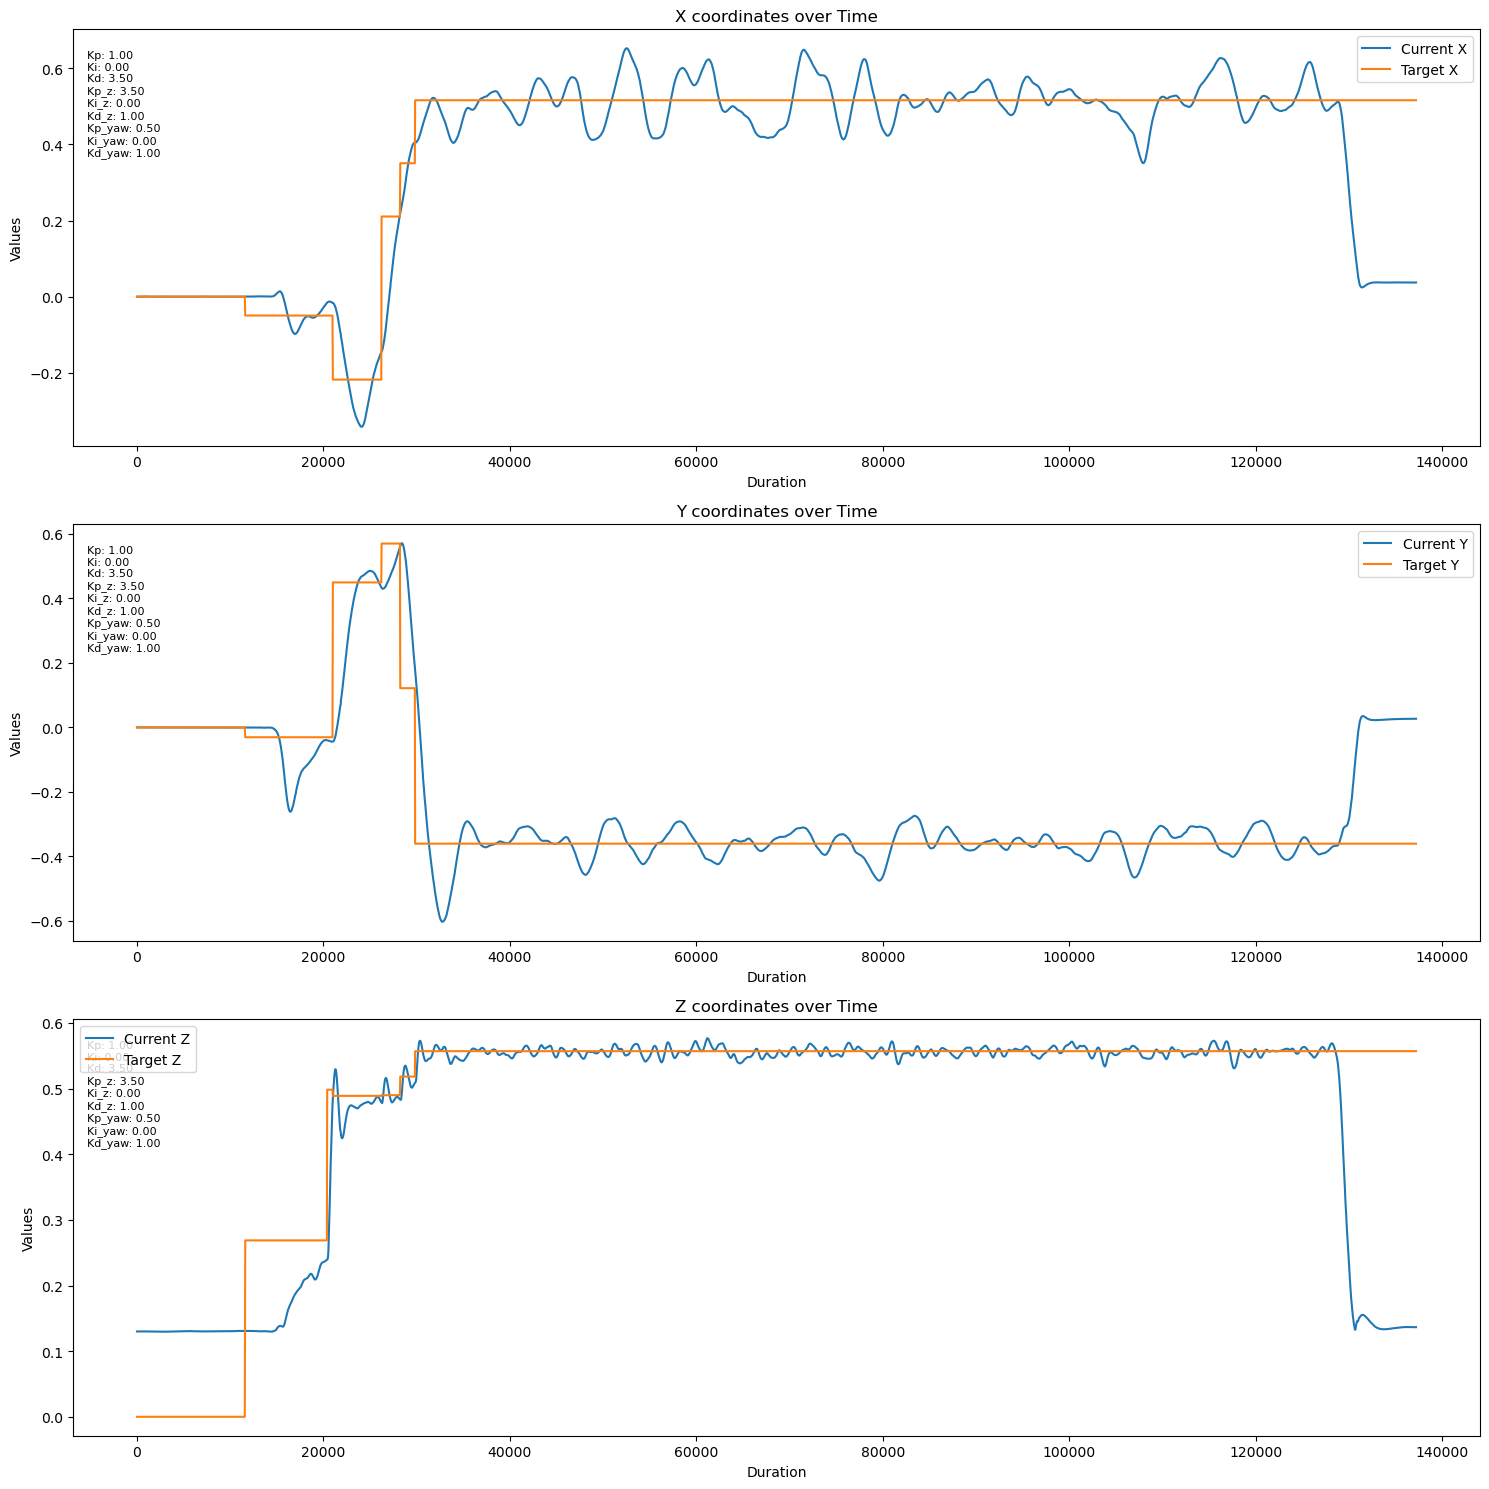

FloatSlider(value=0.0, continuous_update=False, description='Start Time:', max=137165.0)

FloatSlider(value=137165.0, continuous_update=False, description='End Time:', max=137165.0)

In [3]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and already contains the 'Duration' column

# Define the widgets
start_time_widget = widgets.FloatSlider(
    value=df['Duration'].min(),
    min=df['Duration'].min(),
    max=df['Duration'].max(),
    step=0.1,
    description='Start Time:',
    continuous_update=False
)

end_time_widget = widgets.FloatSlider(
    value=df['Duration'].max(),
    min=df['Duration'].min(),
    max=df['Duration'].max(),
    step=0.1,
    description='End Time:',
    continuous_update=False
)

# Define the plotting function
def plot_error_data_interval(df, start_time, end_time):
    # Filter the DataFrame based on the selected time interval
    mask = (df['Duration'] >= start_time) & (df['Duration'] <= end_time)
    filtered_df = df[mask]

    # Create a figure with three subplots
    fig, axs = plt.subplots(3, 1, figsize=(15, 15))

    # Plotting current pose, target pose, and error of X
    axs[0].plot(filtered_df['Duration'], filtered_df['Current Pose X'], label='Current X')
    axs[0].plot(filtered_df['Duration'], filtered_df['Target Pose X'], label='Target X')
    # axs[0].plot(filtered_df['Duration'], filtered_df['Error X'], label='Error X')
    # Plotting velocity_out and velocity_in of X
    # axs[0].plot(filtered_df['Duration'], filtered_df['Velocity_out X'], label='Velocity_out X')
    # axs[0].plot(filtered_df['Duration'], filtered_df['Velocity_in X'], label='Velocity_in X')
    axs[0].set_title('X coordinates over Time')
    axs[0].legend()

    # Plotting current pose, target pose, and error of Y
    axs[1].plot(filtered_df['Duration'], filtered_df['Current Pose Y'], label='Current Y')
    axs[1].plot(filtered_df['Duration'], filtered_df['Target Pose Y'], label='Target Y')
    # axs[1].plot(filtered_df['Duration'], filtered_df['Error Y'], label='Error Y')
    # Plotting velocity_out and velocity_in of Y
    # axs[1].plot(filtered_df['Duration'], filtered_df['Velocity_out Y'], label='Velocity_out Y')
    # axs[1].plot(filtered_df['Duration'], filtered_df['Velocity_in Y'], label='Velocity_in Y')
    axs[1].set_title('Y coordinates over Time')
    axs[1].legend()

    # Plotting current pose, target pose, and error of Z
    axs[2].plot(filtered_df['Duration'], filtered_df['Current Pose Z'], label='Current Z')
    axs[2].plot(filtered_df['Duration'], filtered_df['Target Pose Z'], label='Target Z')
    # axs[2].plot(filtered_df['Duration'], filtered_df['Error Z'], label='Error Z')
    # Plotting velocity_out and velocity_in of Z
    # axs[2].plot(filtered_df['Duration'], filtered_df['Velocity_out Z'], label='Velocity_out Z')
    # axs[2].plot(filtered_df['Duration'], filtered_df['Velocity_in Z'], label='Velocity_in Z')
    axs[2].set_title('Z coordinates over Time')
    axs[2].legend()

    # PID values to monitor and their initial values
    pid_columns = ['Kp', 'Ki', 'Kd', 'Kp_z', 'Ki_z', 'Kd_z', 'Kp_yaw', 'Ki_yaw', 'Kd_yaw']
    initial_pid_values = {col: df[col].iloc[0] for col in pid_columns}
    # Add text annotations for initial PID values
    pid_text = '\n'.join([f"{key}: {value:.2f}" for key, value in initial_pid_values.items()])
    for ax in axs:
        ax.text(0.01, 0.95, pid_text, transform=ax.transAxes, fontsize=8, verticalalignment='top')

    # PID values to monitor
    pid_columns = ['Kp', 'Ki', 'Kd', 'Kp_z', 'Ki_z', 'Kd_z', 'Kp_yaw', 'Ki_yaw', 'Kd_yaw']
    # Detect changes and draw vertical lines, and add text labels
    for i, pid_col in enumerate(pid_columns):
        last_value = None
        for index, row in filtered_df.iterrows():
            if last_value is not None and row[pid_col] != last_value:
                for ax in axs:
                    ax.axvline(x=row['Duration'], color='r', linestyle='--', linewidth=0.5)
                    # Add text label
                    label = f"{pid_col}: {row[pid_col]}"
                    ax.text(row['Duration'], ax.get_ylim()[1], label, rotation=90, verticalalignment='top', color='r', fontsize=8)
            last_value = row[pid_col]


    # Set common labels
    for ax in axs:
        ax.set_xlabel('Duration')
        ax.set_ylabel('Values')

    plt.tight_layout()
    plt.show()

# Define a function to update the plot
def update_plot(change):
    clear_output(wait=True)
    plot_error_data_interval(df, start_time_widget.value, end_time_widget.value)
    display(start_time_widget, end_time_widget)

# Observe changes in the widget values
start_time_widget.observe(update_plot, names='value')
end_time_widget.observe(update_plot, names='value')

# Initial plot
plot_error_data_interval(df, start_time_widget.value, end_time_widget.value)

# Display the widgets
display(start_time_widget, end_time_widget)


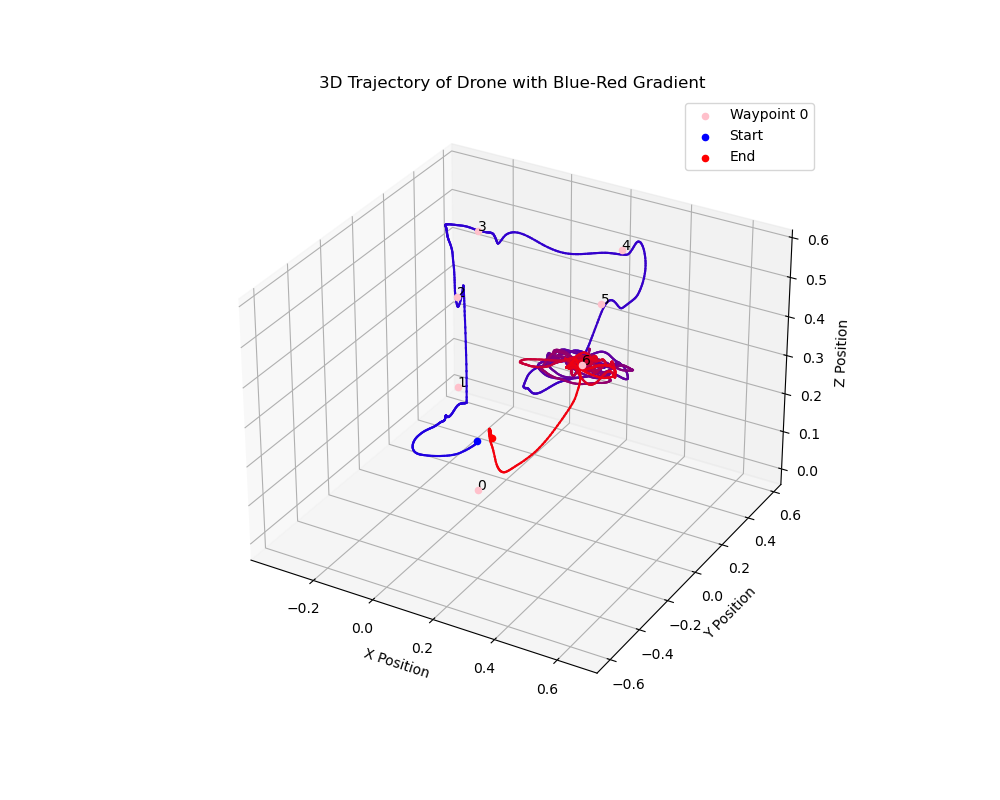

In [4]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def plot_3d_trajectory(df):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Number of points in the trajectory
    num_points = len(df)

    # Create a custom color map from blue to red
    colors = [(0, 0, 1), (1, 0, 0)]  # Blue to Red
    cmap_name = 'blue_red'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=num_points)

    #ax.plot(df['Current Pose X'], df['Current Pose Y'], df['Current Pose Z'], label='Drone Trajectory')
    #Plot each segment with a different color
    for i in range(num_points - 1):
        ax.plot(df['Current Pose X'][i:i+2], df['Current Pose Y'][i:i+2], df['Current Pose Z'][i:i+2], color=cm(i / num_points))
    
    # Plot waypoints with labels
    last_wp = (None, None, None)
    waypoint_number = 0
    for index, row in df.iterrows():
        current_wp = (row['Target Pose X'], row['Target Pose Y'], row['Target Pose Z'])
        if current_wp != last_wp:
            ax.scatter(*current_wp, color='pink', marker='o', label='Waypoint {}'.format(waypoint_number) if waypoint_number == 0 else "")
            ax.text(*current_wp, str(waypoint_number), color='black')
            last_wp = current_wp
            waypoint_number += 1

    # Plot start and end points
    ax.scatter(df['Current Pose X'].iloc[0], df['Current Pose Y'].iloc[0], df['Current Pose Z'].iloc[0], color='blue', label='Start')
    ax.scatter(df['Current Pose X'].iloc[-1], df['Current Pose Y'].iloc[-1], df['Current Pose Z'].iloc[-1], color='red', label='End')
    
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    ax.set_title('3D Trajectory of Drone with Blue-Red Gradient')
    ax.legend()

    plt.show()

# Use this function to plot the 3D trajectory
plot_3d_trajectory(df)


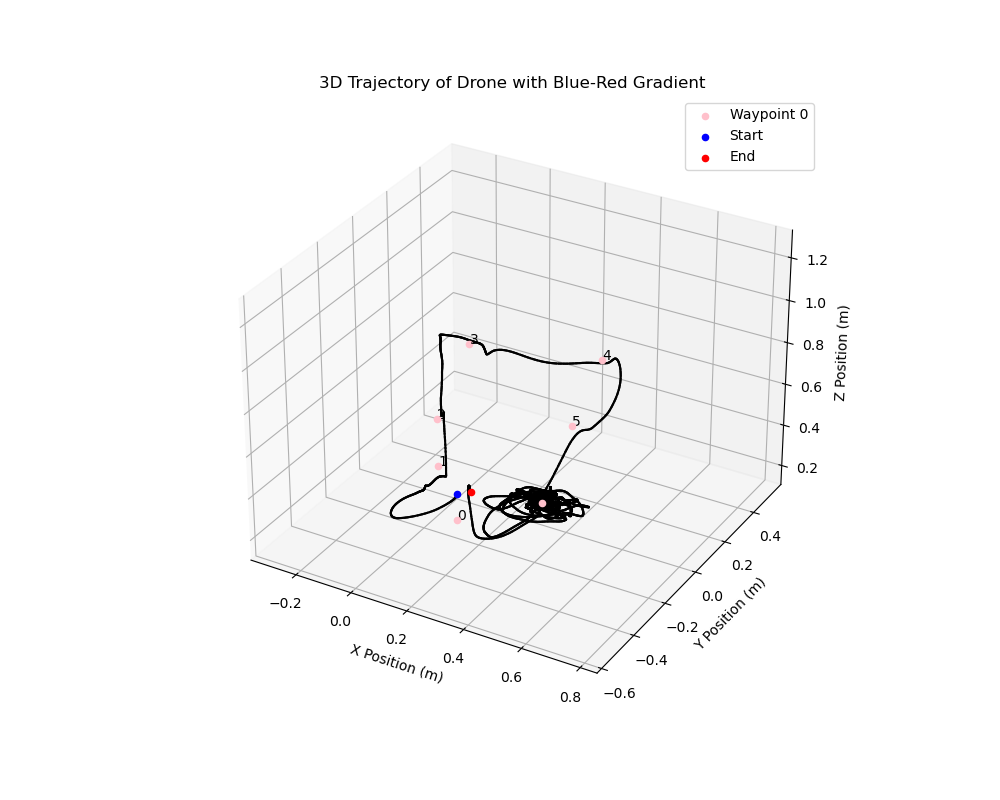

No such comm: 61768226c53a41f58195ad72bab2f055


In [5]:
%matplotlib widget
def plot_3d_trajectory(df):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Number of points in the trajectory
    num_points = len(df)

    # Create a custom color map from blue to red
    colors = [(0, 0, 1), (1, 0, 0)]  # Blue to Red
    cmap_name = 'blue_red'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=num_points)

    # Plot trajectory with a black line
    for i in range(num_points - 1):
        ax.plot(df['Current Pose X'][i:i+2], df['Current Pose Y'][i:i+2], df['Current Pose Z'][i:i+2], color='black')
    
    # Plot waypoints with labels
    last_wp = (None, None, None)
    waypoint_number = 0
    for index, row in df.iterrows():
        current_wp = (row['Target Pose X'], row['Target Pose Y'], row['Target Pose Z'])
        if current_wp != last_wp:
            ax.scatter(*current_wp, color='pink', marker='o', label='Waypoint {}'.format(waypoint_number) if waypoint_number == 0 else "")
            ax.text(*current_wp, str(waypoint_number), color='black')
            last_wp = current_wp
            waypoint_number += 1

    # Plot start and end points
    ax.scatter(df['Current Pose X'].iloc[0], df['Current Pose Y'].iloc[0], df['Current Pose Z'].iloc[0], color='blue', label='Start')
    ax.scatter(df['Current Pose X'].iloc[-1], df['Current Pose Y'].iloc[-1], df['Current Pose Z'].iloc[-1], color='red', label='End')
    
    ax.set_xlabel('X Position (m)')
    ax.set_ylabel('Y Position (m)')
    ax.set_zlabel('Z Position (m)')
    ax.set_title('3D Trajectory of Drone with Blue-Red Gradient')

    # Determine the axis limits automatically and set scale to 1 meter
    max_extent = max(df['Current Pose X'].max() - df['Current Pose X'].min(),
                     df['Current Pose Y'].max() - df['Current Pose Y'].min(),
                     df['Current Pose Z'].max() - df['Current Pose Z'].min())

    ax.set_xlim([df['Current Pose X'].min(), df['Current Pose X'].min() + max_extent])
    ax.set_ylim([df['Current Pose Y'].min(), df['Current Pose Y'].min() + max_extent])
    ax.set_zlim([df['Current Pose Z'].min(), df['Current Pose Z'].min() + max_extent])

    ax.legend()

    
    plt.show()

# Use this function to plot the 3D trajectory
plot_3d_trajectory(df)


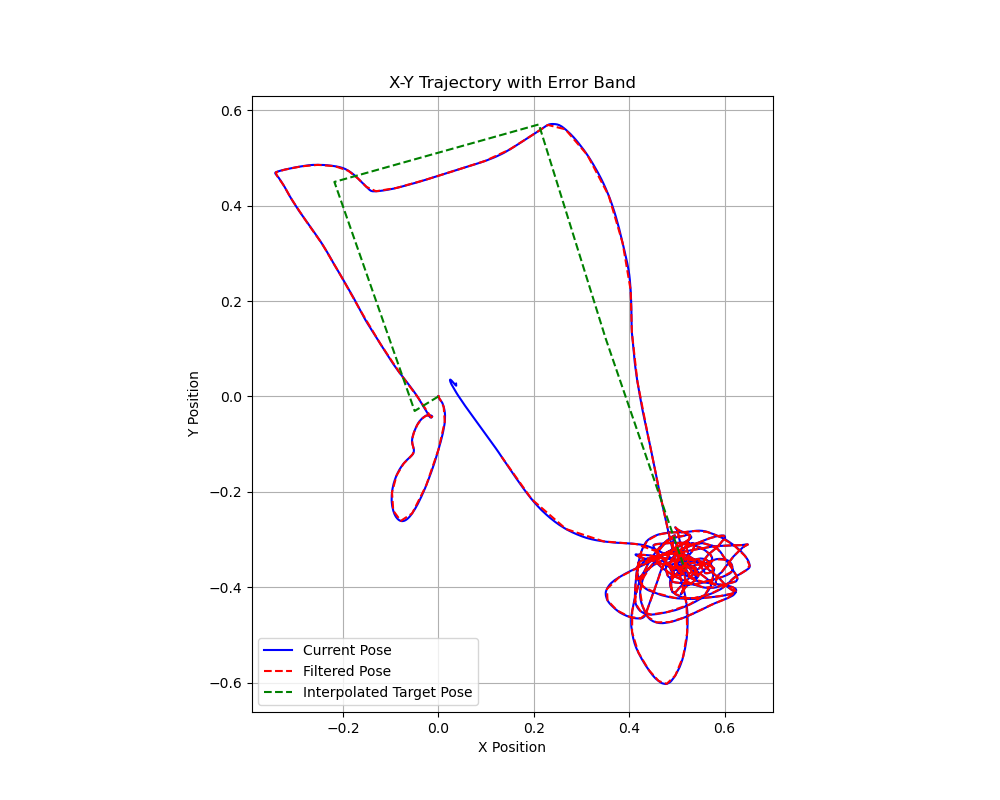

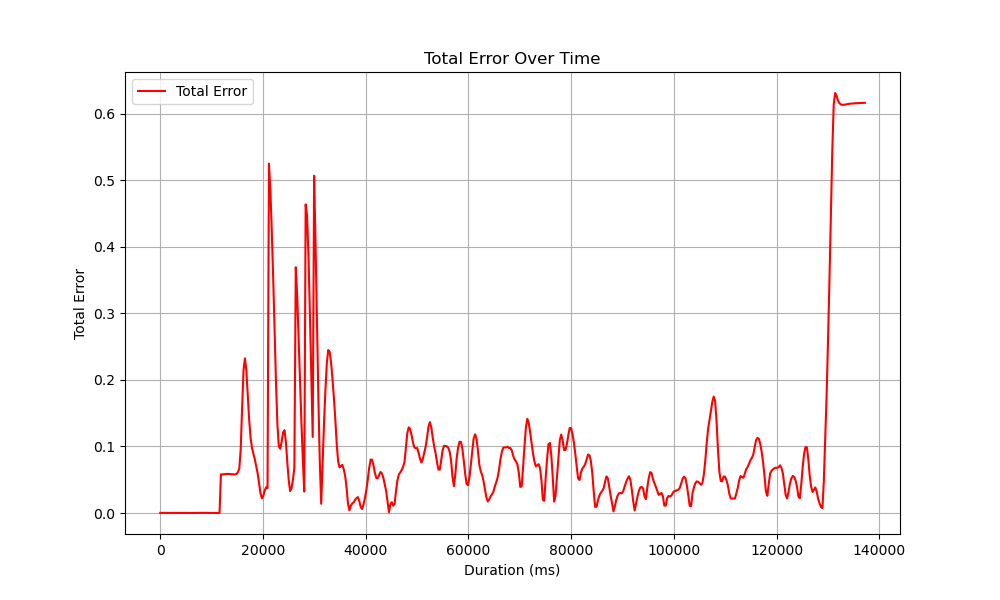

In [6]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

def plot_xy_curve_with_error_band(df):
    # Interpolate target points for a smooth curve
    f_x = interp1d(df['Duration'], df['Target Pose X'], kind='linear', fill_value='extrapolate')
    f_y = interp1d(df['Duration'], df['Target Pose Y'], kind='linear', fill_value='extrapolate')

    # Create a fine grid for duration
    duration_fine = np.linspace(df['Duration'].min(), df['Duration'].max(), num=500)

    # Calculate interpolated values
    target_x_fine = f_x(duration_fine)
    target_y_fine = f_y(duration_fine)

    # Calculate error
    # Interpolate current poses to the same grid as target poses
    current_x_fine = np.interp(duration_fine, df['Duration'], df['Current Pose X'])
    current_y_fine = np.interp(duration_fine, df['Duration'], df['Current Pose Y'])
    error_x = current_x_fine - target_x_fine
    error_y = current_y_fine - target_y_fine
    total_error = np.sqrt(error_x**2 + error_y**2)

    # Remove outliers using Z-score method
    z_scores = np.abs(zscore(total_error))
    threshold = 3  # Common choice for outlier threshold
    non_outliers = (z_scores< threshold)
    # Filter out outlier data for interpolated values
    filtered_x = current_x_fine[non_outliers]
    filtered_y = current_y_fine[non_outliers]
    
    # Plotting
    plt.figure(figsize=(10, 8))
    ax = plt.gca()  # Get current axis
    # Plot the current pose X-Y curve
    ax.plot(df['Current Pose X'], df['Current Pose Y'], label='Current Pose', color='blue')
    
    # Plot the trajectory with outliers removed
    ax.plot(filtered_x, filtered_y, label='Filtered Pose', color='red', linestyle='--')

    # Plot the interpolated target pose X-Y curve
    ax.plot(target_x_fine, target_y_fine, label='Interpolated Target Pose', color='green', linestyle='--')
    ax.set_aspect('equal', adjustable='box')
    # Add error bands
    # plt.fill_betweenx(target_y_fine, df['Current Pose Y'], tarcolor='gray', alpha=0.5)

    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('X-Y Trajectory with Error Band')
    plt.legend()
    plt.grid(True)
    plt.show()

# Usage
plot_xy_curve_with_error_band(df)

def plot_total_error(df):
    # Interpolate target points for a smooth curve
    f_x = interp1d(df['Duration'], df['Target Pose X'], kind='linear', fill_value='extrapolate')
    f_y = interp1d(df['Duration'], df['Target Pose Y'], kind='linear', fill_value='extrapolate')

    # Create a fine grid for duration
    duration_fine = np.linspace(df['Duration'].min(), df['Duration'].max(), num=500)

    # Calculate interpolated values
    target_x_fine = f_x(duration_fine)
    target_y_fine = f_y(duration_fine)

    # Calculate error
    error_x = np.interp(duration_fine, df['Duration'], df['Current Pose X']) - target_x_fine
    error_y = np.interp(duration_fine, df['Duration'], df['Current Pose Y']) - target_y_fine

    # Calculate total error as the perpendicular distance to the target curve
    total_error = np.sqrt(error_x**2 + error_y**2)

    # Plotting total error
    plt.figure(figsize=(10, 6))
    plt.plot(duration_fine, total_error, label='Total Error', color='red')
    plt.xlabel('Duration (ms)')
    plt.ylabel('Total Error')
    plt.title('Total Error Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Usage
plot_total_error(df)





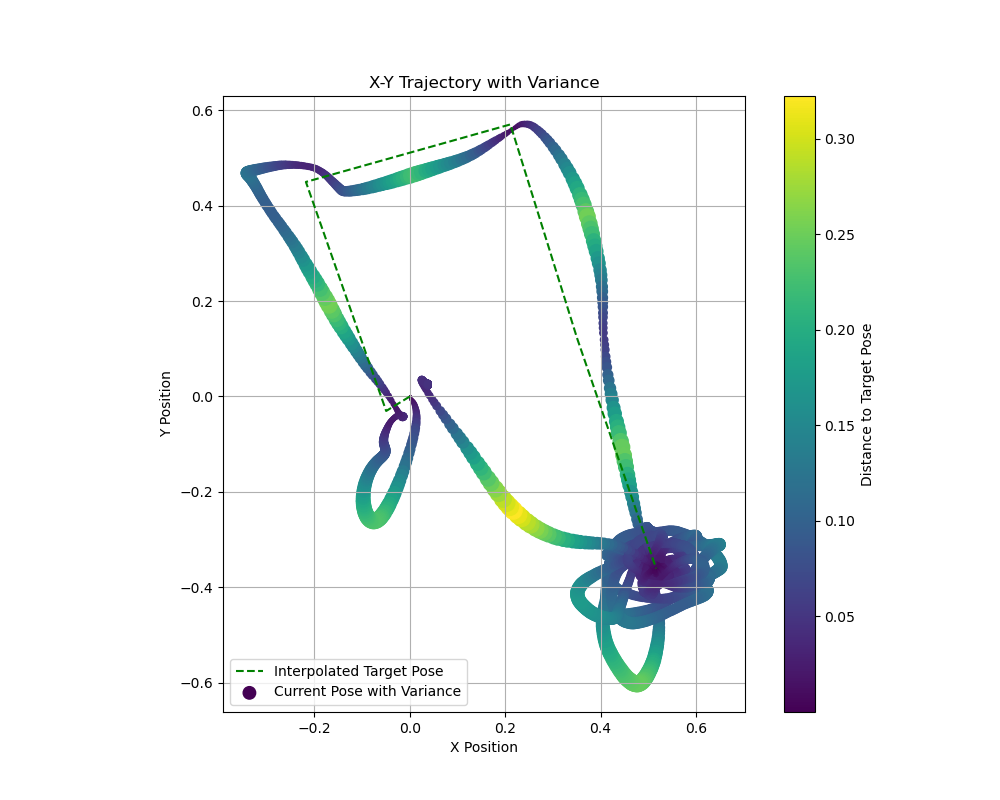

Variance of the distances to the target trajectory: 0.0025645909356262686


In [7]:
from scipy.spatial.distance import cdist

def plot_xy_curve_with_variance(df):
    # Interpolate target points for a smooth curve
    f_x = interp1d(df['Duration'], df['Target Pose X'], kind='linear', fill_value='extrapolate')
    f_y = interp1d(df['Duration'], df['Target Pose Y'], kind='linear', fill_value='extrapolate')

    # Create a fine grid for duration
    duration_fine = np.linspace(df['Duration'].min(), df['Duration'].max(), num=500)

    # Calculate interpolated values
    target_x_fine = f_x(duration_fine)
    target_y_fine = f_y(duration_fine)

    # Calculate the perpendicular distances to the target trajectory
    current_positions = np.vstack((df['Current Pose X'], df['Current Pose Y'])).T
    target_positions = np.vstack((target_x_fine, target_y_fine)).T
    distances = np.min(cdist(current_positions, target_positions), axis=1)
    variance = np.var(distances)

    # Scaling factor for dot sizes (adjust as needed)
    scale_factor = 100  # Adjust this value to scale the dot sizes
    alpha_value = 1  # Adjust this value to change the transparency of the dots

    # Calculate dot sizes (scaled by error)
    dot_sizes = scale_factor * distances *5

    # Plotting
    plt.figure(figsize=(10, 8))
    ax = plt.gca()

    # Plot the interpolated target pose X-Y curve
    ax.plot(target_x_fine, target_y_fine, label='Interpolated Target Pose', color='green', linestyle='--')

    # Plot the current pose X-Y curve with varying dot sizes
    sc = ax.scatter(df['Current Pose X'], df['Current Pose Y'], s=dot_sizes, c=distances, cmap='viridis', alpha=alpha_value, label='Current Pose with Variance')
    plt.colorbar(sc, label='Distance to Target Pose')

    ax.set_aspect('equal', adjustable='box')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('X-Y Trajectory with Variance')
    plt.legend()
    plt.grid(True)
    plt.show()

    return variance

# Usage
variance = plot_xy_curve_with_variance(df)
print(f"Variance of the distances to the target trajectory: {variance}")